## Lakers Player Recommendations

### Imports

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.patches import Patch
import seaborn as sns
%matplotlib inline

In [2]:
player_percentiles = pd.read_csv('../outputs/player_playtypes_percentiles_2015_2024.csv')

In [6]:
player_percentiles_2024 = player_percentiles[player_percentiles['SeasonYear'] == '2024-25']

In [13]:
playtype_data = pd.read_csv('../outputs/playtype_data_2015_2024.csv')

In [17]:
playtype_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43917 entries, 0 to 43916
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SeasonYear         43917 non-null  object 
 1   SEASON_ID          43917 non-null  int64  
 2   PLAYER_ID          43917 non-null  float64
 3   PLAYER_NAME        43917 non-null  object 
 4   TEAM_ID            43917 non-null  float64
 5   TEAM_ABBREVIATION  43917 non-null  object 
 6   TEAM_NAME          43917 non-null  object 
 7   PLAY_TYPE          43917 non-null  object 
 8   TYPE_GROUPING      43917 non-null  object 
 9   PERCENTILE         43917 non-null  float64
 10  GP                 43917 non-null  float64
 11  POSS_PCT           43917 non-null  float64
 12  PPP                43917 non-null  float64
 13  FG_PCT             43917 non-null  float64
 14  FT_POSS_PCT        43917 non-null  float64
 15  TOV_POSS_PCT       43917 non-null  float64
 16  SF_POSS_PCT        439

In [18]:
# Group by PLAY_TYPE and TYPE_GROUPING, then sum the POSS column
playtype_summary = playtype_data.groupby(['PLAY_TYPE', 'TYPE_GROUPING'])['POSS'].sum().reset_index()

# Rename the summed column for clarity
playtype_summary.rename(columns={'POSS': 'Total_POSS'}, inplace=True)

# Sort the summary table in descending order by Total_POSS
playtype_summary.sort_values(by='Total_POSS', ascending=False)

,PLAY_TYPE,TYPE_GROUPING,Total_POSS
13,Spotup,Offensive,10235.6
12,Spotup,Defensive,10233.4
6,PRBallHandler,Defensive,9490.4
7,PRBallHandler,Offensive,8206.8
0,Cut,Offensive,3048.4
9,PRRollMan,Offensive,2707.3
3,Misc,Offensive,2371.6
11,Postup,Offensive,2235.7
10,Postup,Defensive,2218.2
2,Handoff,Offensive,2100.5


This table above shows us what attributes are more prevalent, which will help us put more weight behind certain attributes when identifying players that would be valuable additions.

### Context

**From the LeBron analysis models:** After analyzing the features deemed important towards strong net, offensive, and defensive ratings, we found that most of the key features were for the PF and C position, with the skillsets of **Defensive_PRBallHandler, Defensive_OffScreen, Defensive_PRRollMan, and Offensive_Cut** being the key skillsets. In this recommendations script, we will be looking for big men from the 2024-2025 season that have succeeded in those attributes. Based on the playtype summary above, extra weight will be put on the Defensive_PRBallHandler and Offensive_Cut attributes.

**From the Luka analysis models:** After analyzing the features deemed important towards strong net, offensive, and defensive ratings, we found that most of the key features were for the SG and SF position, with the skillsets of **Offensive_PostUp, Offensive_SpotUp, Offensive_OffScreen, and Defensive_Handoff** being the key skillsets. In this recommendations script, we will be looking for wings from the 2024-2025 season that have succeeded in those attributes. Based on the playtype summary above, extra weight will be put on the Offensive_SpotUp (mostly this) and Offensive_PostUp attributes.

In [8]:
player_percentiles_2024.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 0 to 4157
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   PLAYER_NAME              404 non-null    object 
 1   Player_Abbrev            404 non-null    object 
 2   SeasonYear               404 non-null    object 
 3   Defensive_Handoff        404 non-null    float64
 4   Defensive_OffScreen      404 non-null    float64
 5   Defensive_PRBallHandler  404 non-null    float64
 6   Defensive_PRRollMan      404 non-null    float64
 7   Defensive_Postup         404 non-null    float64
 8   Defensive_Spotup         404 non-null    float64
 9   Offensive_Cut            404 non-null    float64
 10  Offensive_Handoff        404 non-null    float64
 11  Offensive_Misc           404 non-null    float64
 12  Offensive_OffScreen      404 non-null    float64
 13  Offensive_PRBallHandler  404 non-null    float64
 14  Offensive_PRRollMan      

### Big Man Research

In [9]:
player_percentiles_2024.sort_values(by='Defensive_PRBallHandler', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
1201,Elfrid Payton,E. Payton,2024-25,0.000,0.000,0.9960,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,0.024,0.000,0.000,0.000
95,Alex Caruso,A. Caruso,2024-25,0.000,0.339,0.9950,0.855,0.142,0.0000,0.228,0.000,0.848,0.000,0.077,0.093,0.000,0.355
1716,Jalen Pickett,J. Pickett,2024-25,0.960,0.000,0.9890,0.000,0.471,0.7090,0.000,0.000,0.000,0.000,0.958,0.000,0.000,0.209
2843,Micah Potter,M. Potter,2024-25,0.940,0.000,0.9870,0.000,0.000,0.0000,0.147,0.000,0.093,0.000,0.000,0.190,0.000,0.497
77,Alec Burks,A. Burks,2024-25,0.336,0.694,0.9820,0.000,0.000,0.3500,0.000,0.900,0.350,0.985,0.891,0.000,0.000,0.765
2137,Josh Okogie,J. Okogie,2024-25,0.020,0.000,0.9775,0.000,0.000,0.9865,0.261,0.000,0.000,0.000,0.000,0.000,0.000,0.601
2071,Jordan Goodwin,J. Goodwin,2024-25,0.589,0.000,0.9760,0.000,0.000,0.0720,0.000,0.000,1.000,0.000,0.183,0.000,0.000,0.867
2951,Mouhamed Gueye,M. Gueye,2024-25,0.000,0.000,0.9740,0.000,0.000,0.0880,0.490,0.000,0.000,0.000,0.000,0.000,0.000,0.072
2486,Kyle Lowry,K. Lowry,2024-25,0.000,0.000,0.9710,0.000,0.925,0.0000,0.000,0.000,0.620,0.000,0.106,0.000,0.000,0.405
2716,Marcus Sasser,M. Sasser,2024-25,0.000,0.736,0.9710,0.000,0.000,0.0000,0.000,0.969,0.454,0.000,0.827,0.000,0.000,0.000


Some big men that stand out in this guard dominated dataset are Mouhamed Gueye, Trendon Watford, Lauri Markkanen, Mitchell Robinson, Santi Aldama, and Dean Wade.

In [10]:
player_percentiles_2024.sort_values(by='Defensive_OffScreen', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
1117,Draymond Green,D. Green,2024-25,0.893,0.996,0.871,0.516,0.471,0.163,0.381,0.000,0.198,0.000,0.322,0.113,0.016,0.332
4009,Victor Wembanyama,V. Wembanyama,2024-25,0.000,0.993,0.356,0.940,0.812,0.449,0.399,0.517,0.864,0.492,0.240,0.621,0.558,0.501
3458,Rudy Gobert,R. Gobert,2024-25,0.000,0.989,0.551,0.698,0.000,0.936,0.588,0.000,0.747,0.000,0.000,0.520,0.069,0.000
2986,Naz Reid,N. Reid,2024-25,0.000,0.982,0.000,0.912,0.375,0.610,0.333,0.764,0.469,0.729,0.449,0.448,0.623,0.521
3076,Noah Clowney,N. Clowney,2024-25,0.023,0.982,0.683,0.336,0.229,0.668,0.000,0.062,0.701,0.399,0.000,0.073,0.000,0.285
2159,Jrue Holiday,J. Holiday,2024-25,0.840,0.975,0.259,0.222,0.142,0.818,0.000,0.000,0.673,0.551,0.644,0.296,0.277,0.443
1650,Jaden Ivey,J. Ivey,2024-25,0.907,0.967,0.000,0.000,0.000,0.000,0.956,0.764,0.000,0.442,0.420,0.000,0.000,0.892
1093,Donte DiVincenzo,D. DiVincenzo,2024-25,0.000,0.967,0.456,0.000,0.884,0.380,0.000,0.112,0.511,0.283,0.490,0.000,0.000,0.950
1610,Ja'Kobe Walter,J. Walter,2024-25,0.020,0.960,0.011,0.000,0.000,0.816,0.399,0.795,0.072,0.884,0.301,0.927,0.000,0.194
1813,Jarred Vanderbilt,J. Vanderbilt,2024-25,0.000,0.956,0.828,0.000,0.000,0.719,0.037,0.000,0.316,0.000,0.000,0.000,0.000,0.136


Some attainable big men that stand out in this dataset are Noah Clowney, Jarred Vanderbilt (already a Laker), Onyeka Okongwu, Jabari Smith, Simone Fontecchio, and Bobby Portis.

In [11]:
player_percentiles_2024.sort_values(by='Defensive_PRRollMan', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
715,Dalen Terry,D. Terry,2024-25,0.4620,0.326,0.3450,1.000,0.381,0.3200,0.316,0.000,0.734,0.0000,0.872,0.0000,0.000,0.125
3811,Tobias Harris,T. Harris,2024-25,0.1270,0.391,0.5590,0.996,0.949,0.0560,0.643,0.672,0.407,0.9200,0.369,0.6330,0.654,0.000
362,Brandin Podziemski,B. Podziemski,2024-25,0.3360,0.899,0.7810,0.992,0.136,0.7350,0.246,0.135,0.000,0.9290,0.522,0.1710,0.000,0.589
3464,Rui Hachimura,R. Hachimura,2024-25,0.8160,0.254,0.7840,0.988,0.384,0.3200,0.935,0.000,0.548,0.0000,0.000,0.1450,0.338,0.792
2332,Keon Ellis,K. Ellis,2024-25,0.2780,0.371,0.0790,0.984,0.546,0.6520,0.750,0.411,0.386,1.0000,0.984,0.5740,0.000,0.817
1727,Jalen Williams,J. Williams,2024-25,0.8520,0.571,0.9420,0.984,0.537,0.8900,0.799,0.543,0.000,0.6980,0.551,0.0000,0.000,0.720
880,DeAndre Jordan,D. Jordan,2024-25,0.0000,0.000,0.0000,0.976,0.623,0.0000,0.612,0.000,0.000,0.0000,0.000,0.6450,0.000,0.000
1681,Jaime Jaquez Jr.,J. Jaquez Jr.,2024-25,0.4570,0.631,0.4220,0.972,0.109,0.8580,0.000,0.981,0.321,0.0000,0.247,0.0000,0.222,0.238
24,Aaron Holiday,A. Holiday,2024-25,0.7790,0.554,0.0000,0.967,0.014,0.0000,0.000,0.000,0.548,0.9140,0.843,0.0000,0.000,0.740
357,Bradley Beal,B. Beal,2024-25,0.0330,0.301,0.1000,0.967,0.224,0.0000,0.787,0.927,0.876,0.4970,0.497,0.4800,0.000,0.774


Some attainable big men that stand out in this dataset are Rui Hachimura (already a Laker), DeAndre Jordan, Bobby Portis, Jerami Grant, Maxi Kleber (already a Laker).

In [12]:
player_percentiles_2024.sort_values(by='Offensive_Cut', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
1030,Devin Vassell,D. Vassell,2024-25,0.973,0.062,0.340,0.595,0.000,0.353,0.997,0.475,0.000,0.778,0.721,0.976,0.000,0.438
3983,Tyrese Maxey,T. Maxey,2024-25,0.240,0.106,0.939,0.151,0.614,0.575,0.993,0.224,0.954,0.889,0.785,0.000,0.000,0.000
2229,Kai Jones,K. Jones,2024-25,0.000,0.000,0.000,0.000,0.000,0.000,0.990,0.000,0.000,0.000,0.000,0.000,0.000,0.000
337,Bol Bol,B. Bol,2024-25,0.000,0.000,0.016,0.000,0.000,0.757,0.983,0.000,0.000,0.000,0.000,0.882,0.000,0.302
1523,Isaiah Collier,I. Collier,2024-25,0.157,0.216,0.517,0.428,0.825,0.334,0.983,0.027,0.083,0.000,0.080,0.000,0.000,0.147
261,Ayo Dosunmu,A. Dosunmu,2024-25,0.243,0.072,0.512,0.440,0.546,0.000,0.976,0.207,0.669,0.000,0.897,0.000,0.000,0.000
1807,Jaren Jackson Jr.,J. Jackson Jr.,2024-25,0.970,0.529,0.715,0.000,0.520,0.000,0.973,0.265,0.664,0.367,0.074,0.685,0.669,0.659
3847,Tosan Evbuomwan,T. Evbuomwan,2024-25,0.215,0.179,0.108,0.000,0.000,0.831,0.969,0.158,0.000,0.000,0.724,0.000,0.000,0.000
2176,Julian Strawther,J. Strawther,2024-25,0.303,0.312,0.141,0.197,0.805,0.235,0.963,0.405,0.765,0.437,0.359,0.000,0.000,0.614
3264,Pelle Larsson,P. Larsson,2024-25,0.057,0.956,0.288,0.548,0.000,0.000,0.959,0.000,0.000,0.000,0.580,0.000,0.000,0.374


Some big men that stand out in this guard dominated dataset are Kai Jones, Bol Bol, Dean Wade, Jalen Smith, Rui Hachimura (already a Laker).

### Big Man Research Results

Targets are identified based on identifying names that are reoccuring throughout the different key attributes and then also putting more weight on the Defensive_PRBallHandler and Offensive_Cut attributes if there are not enough names occurring more than once.

**The targets we have identified are Dean Wade, Bobby Portis, Mouhamed Gueye, and Trendon Watford.**

As for their contract situations:
- Dean Wade is an expiring contract at \$6.6 million
- Bobby Portis has a player option he will likely pick up for \$13 million
- Mo Gueye has two more years of team control at around \$2 million a year
- Trendon Watford is an UFA

In [42]:
target_bigs = ['Dean Wade', 'Bobby Portis', 'Mouhamed Gueye', 'Trendon Watford']
attributes_bigs = ['Defensive_PRBallHandler', 'Defensive_OffScreen', 'Defensive_PRRollMan', 'Offensive_Cut']
key_attributes_bigs = ['Defensive_PRBallHandler', 'Offensive_Cut']

C:\Users\kevin\AppData\Local\Temp\ipykernel_15096\386622916.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


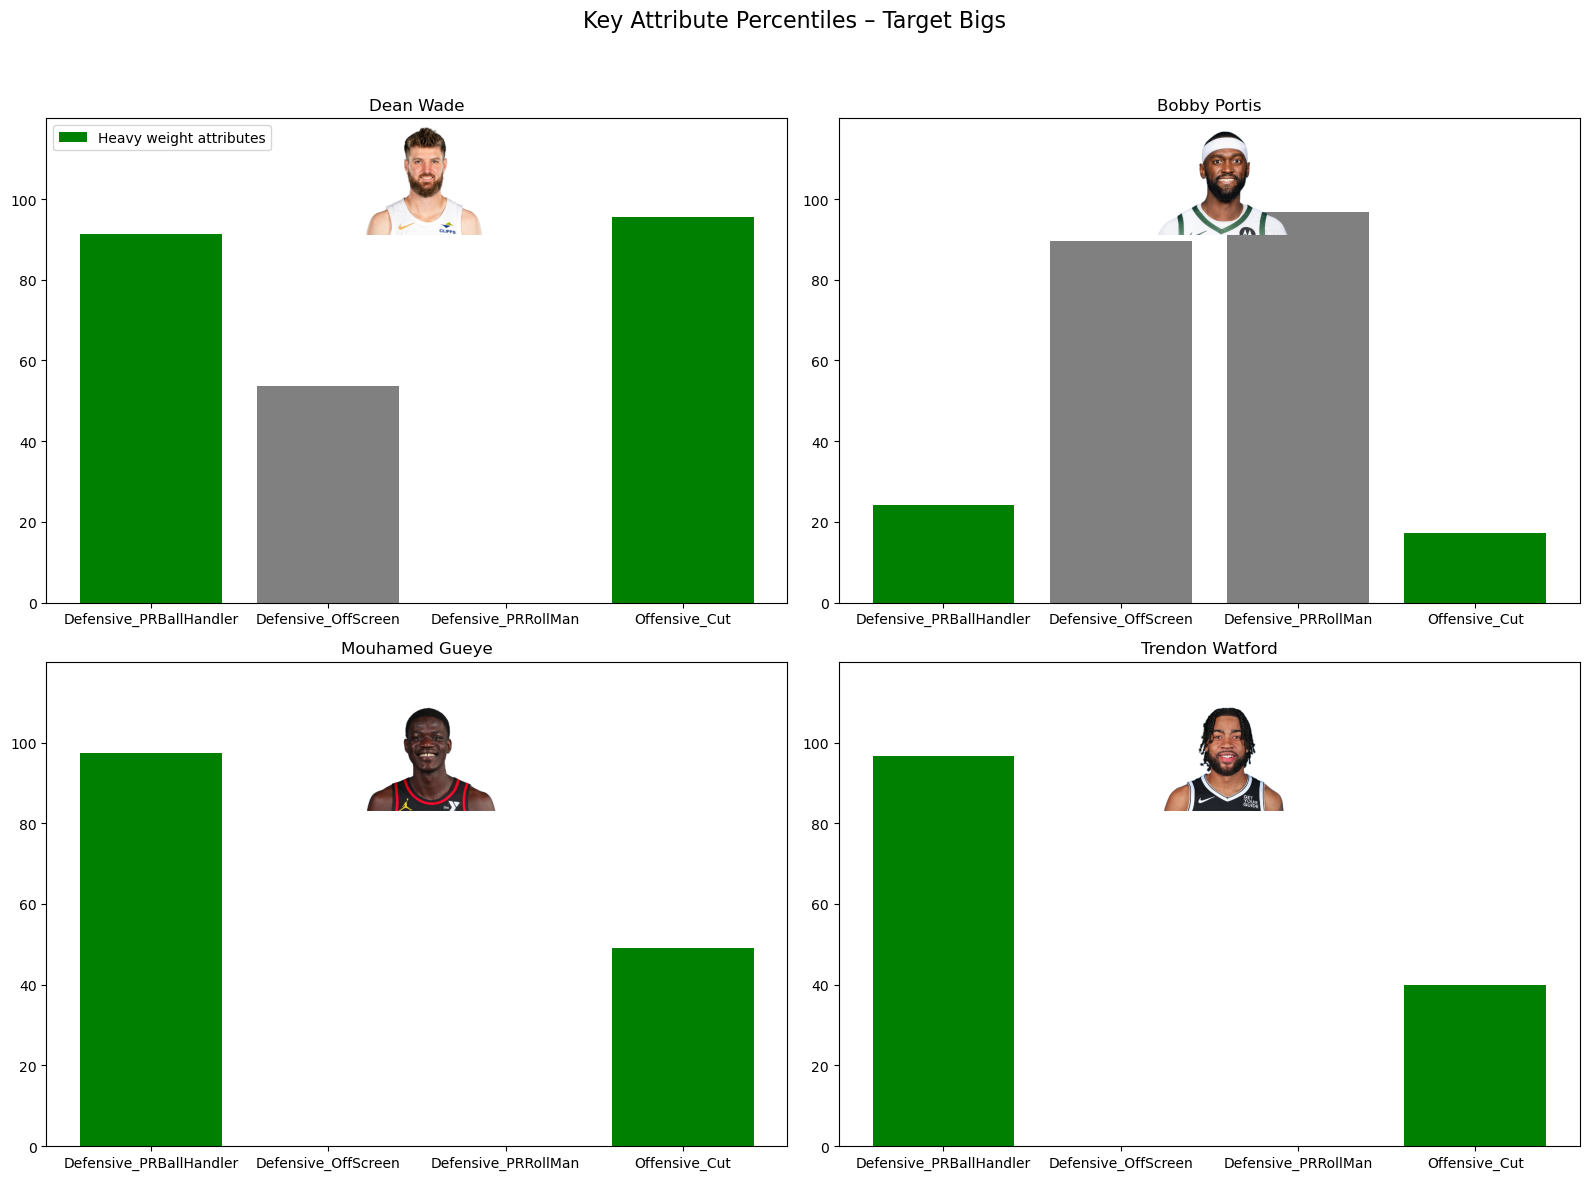

In [45]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

for i, player in enumerate(target_bigs):
    ax = axs[i]
    try:
        # Get player data
        player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
        values = [player_data[attr] * 100 for attr in attributes_bigs]
        colors = ['green' if attr in key_attributes_bigs else 'gray' for attr in attributes_bigs]

        # Create bar chart
        ax.bar(attributes_bigs, values, color=colors)
        ax.set_ylim(0, 120)
        ticks = ax.get_yticks()
        ax.set_yticks([tick for tick in ticks if tick != 120])
        ax.set_title(f"{player}", fontsize=12)
        if i == 0:
            legend_elements = [Patch(facecolor='green', label='Heavy weight attributes')]
            ax.legend(handles=legend_elements, loc='upper left')

        # Add image
        image_path = f'../images/{player.lower().replace(" ", "_")}.png'
        try:
            img = mpimg.imread(image_path)
            img_ax = fig.add_axes([0.22 + (i % 2) * 0.5, 0.79 - (i // 2) * 0.48, 0.1, 0.1])  # Manually position per subplot
            img_ax.imshow(img)
            img_ax.axis('off')
        except FileNotFoundError:
            print(f"Image not found for {player}: {image_path}")

    except IndexError:
        print(f"No data found for {player}")
        ax.set_visible(False)

# Overall layout
fig.suptitle("Key Attribute Percentiles – Target Bigs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Wings Research

In [20]:
player_percentiles_2024.sort_values(by='Offensive_Postup', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
1434,Grant Williams,G. Williams,2024-25,0.0000,0.0000,0.345,0.000,0.976,0.0700,0.167,0.000,0.5480,0.000,0.0000,0.206,1.000,0.3300
1822,Jarrett Allen,J. Allen,2024-25,0.0000,0.1790,0.863,0.512,0.529,0.3200,0.673,0.000,0.7690,0.000,0.0000,0.839,0.992,0.0500
1402,Goga Bitadze,G. Bitadze,2024-25,0.5170,0.0000,0.000,0.329,0.663,0.6790,0.517,0.000,0.2250,0.000,0.0000,0.000,0.985,0.0000
1609,Ja Morant,J. Morant,2024-25,0.2600,0.4750,0.000,0.000,0.245,0.5430,0.579,0.093,0.8610,0.551,0.4170,0.000,0.977,0.6620
3108,Obi Toppin,O. Toppin,2024-25,0.8160,0.0000,0.744,0.829,0.723,0.2460,0.888,0.236,0.7440,0.000,0.8850,0.698,0.969,0.3800
966,Dereck Lively II,D. Lively II,2024-25,0.0000,0.0000,0.842,0.693,0.000,0.4250,0.713,0.000,0.0000,0.000,0.0000,0.605,0.962,0.0000
1017,Devin Booker,D. Booker,2024-25,0.6060,0.6050,0.449,0.073,0.918,0.0290,0.000,0.411,0.0000,0.794,0.6790,0.367,0.954,0.5040
2402,Khris Middleton,K. Middleton,2024-25,0.0000,0.0000,0.591,0.000,0.000,0.5320,0.000,0.699,0.9720,0.000,0.6090,0.000,0.938,0.9830
1639,Jabari Smith Jr.,J. Smith Jr.,2024-25,0.5630,0.9560,0.190,0.112,0.471,0.7860,0.282,0.089,0.9410,0.950,0.1290,0.496,0.931,0.4640
3133,Onyeka Okongwu,O. Okongwu,2024-25,0.0000,0.9560,0.493,0.754,0.435,0.2410,0.585,0.000,0.3980,0.000,0.0000,0.798,0.915,0.4350


Some wings that stand out in this big man dominated dataset are Khris Middleton, Harrison Barnes, Deni Avdija, and Spencer Dinwiddie.

In [21]:
player_percentiles_2024.sort_values(by='Offensive_Spotup', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
2832,Maxwell Lewis,M. Lewis,2024-25,0.000,0.000,0.0000,0.000,0.000,0.9440,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000
870,De'Anthony Melton,D. Melton,2024-25,0.000,0.000,0.8680,0.000,0.000,0.2620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.994
2553,Larry Nance Jr.,L. Nance Jr.,2024-25,0.000,0.000,0.1770,0.440,0.000,0.0030,0.235,0.000,0.154,0.000,0.000,0.000,0.000,0.992
1127,Dru Smith,D. Smith,2024-25,0.000,0.000,0.4380,0.000,0.000,0.0000,0.000,0.000,0.548,0.000,0.708,0.000,0.000,0.986
2402,Khris Middleton,K. Middleton,2024-25,0.000,0.000,0.5910,0.000,0.000,0.5320,0.000,0.699,0.972,0.000,0.609,0.000,0.938,0.983
1703,Jalen Brunson,J. Brunson,2024-25,0.740,0.652,0.0000,0.302,0.888,0.3930,0.486,0.560,0.966,0.508,0.888,0.000,0.822,0.981
2249,Kawhi Leonard,K. Leonard,2024-25,0.950,0.396,0.9500,0.000,0.000,0.3840,0.787,0.856,0.775,0.201,0.692,0.000,0.558,0.978
4021,Vít Krejčí,V. Krejčí,2024-25,0.200,0.715,0.9600,0.794,0.045,0.5560,0.017,0.317,0.191,0.000,0.599,0.044,0.000,0.975
3506,Sam Hauser,S. Hauser,2024-25,0.123,0.106,0.3540,0.000,0.045,0.3990,0.000,0.915,0.225,0.668,0.978,0.633,0.000,0.967
1330,Garrison Mathews,G. Mathews,2024-25,0.913,0.533,0.0770,0.000,0.000,0.2730,0.000,0.336,0.000,0.399,0.010,0.008,0.000,0.964


Some attainable wings that stand out in this dataset are De'Anthony Melton, Dru Smith, Khris Middleton, Vít Krejčí, Sam Hauser, Garrison Mathews, Donte DiVincenzo, Austin Reaves (already a Laker), Grayson Allen, Malik Beasley, and Dante Exum.

In [23]:
player_percentiles_2024.sort_values(by='Offensive_OffScreen', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
2332,Keon Ellis,K. Ellis,2024-25,0.278,0.3710,0.0790,0.984,0.5460,0.6520,0.750,0.4110,0.3860,1.000,0.984,0.574,0.000,0.817
1315,Gabe Vincent,G. Vincent,2024-25,0.278,0.2330,0.8230,0.073,0.8950,0.4140,0.925,0.2890,0.0930,0.995,0.054,0.028,0.000,0.598
2676,Malik Monk,M. Monk,2024-25,0.872,0.5800,0.6860,0.393,0.0620,0.0990,0.929,0.4020,0.0000,0.990,0.699,0.263,0.000,0.155
77,Alec Burks,A. Burks,2024-25,0.336,0.6940,0.9820,0.000,0.0000,0.3500,0.000,0.9000,0.3500,0.985,0.891,0.000,0.000,0.765
1002,Derrick White,D. White,2024-25,0.120,0.7500,0.4510,0.744,0.6230,0.0000,0.156,0.7560,0.3680,0.980,0.779,0.004,0.000,0.917
3263,Payton Pritchard,P. Pritchard,2024-25,0.696,0.7820,0.3910,0.000,0.8740,0.6840,0.000,0.9610,0.8670,0.975,0.968,0.815,0.000,0.889
2788,Matas Buzelis,M. Buzelis,2024-25,0.872,0.0000,0.2350,0.440,0.1800,0.8740,0.595,0.8190,0.5480,0.965,0.285,0.960,0.000,0.086
277,Ben Sheppard,B. Sheppard,2024-25,0.336,0.5600,0.0000,0.032,0.8560,0.0000,0.787,0.0190,0.9910,0.965,0.599,0.000,0.000,0.000
1639,Jabari Smith Jr.,J. Smith Jr.,2024-25,0.563,0.9560,0.1900,0.112,0.4710,0.7860,0.282,0.0890,0.9410,0.950,0.129,0.496,0.931,0.464
3977,Tyrese Haliburton,T. Haliburton,2024-25,0.000,0.0800,0.8790,0.470,0.5630,0.0000,0.000,0.8760,0.7900,0.940,0.933,0.000,0.000,0.000


Some attainable wings that stand out in this dataset are Keon Ellis, Gabe Vincent (already a Laker), Malik Monk, Alec Burks, Ben Sheppard, Deni Avdija, Harrison Barnes, Tyrese Martin, and Ja'Kobe Walter.

In [24]:
player_percentiles_2024.sort_values(by='Defensive_Handoff', ascending=False).head(25)

,PLAYER_NAME,Player_Abbrev,SeasonYear,Defensive_Handoff,Defensive_OffScreen,Defensive_PRBallHandler,Defensive_PRRollMan,Defensive_Postup,Defensive_Spotup,Offensive_Cut,Offensive_Handoff,Offensive_Misc,Offensive_OffScreen,Offensive_PRBallHandler,Offensive_PRRollMan,Offensive_Postup,Offensive_Spotup
571,Chet Holmgren,C. Holmgren,2024-25,1.000,0.000,0.538,0.643,0.946,0.824,0.167,0.000,0.734,0.342,0.599,0.536,0.016,0.823
269,Bam Adebayo,B. Adebayo,2024-25,0.997,0.241,0.201,0.230,0.366,0.620,0.639,0.000,0.596,0.457,0.766,0.323,0.185,0.515
1712,Jalen Johnson,J. Johnson,2024-25,0.993,0.866,0.483,0.548,0.251,0.535,0.259,0.508,0.804,0.000,0.290,0.444,0.054,0.222
2449,Kristaps Porziņģis,K. Porziņģis,2024-25,0.990,0.000,0.069,0.298,0.163,0.604,0.000,0.000,0.464,0.327,0.000,0.851,0.885,0.529
2002,John Konchar,J. Konchar,2024-25,0.990,0.855,0.216,0.000,0.000,0.115,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.042
2313,Kenrich Williams,K. Williams,2024-25,0.980,0.822,0.709,0.000,0.870,0.893,0.449,0.000,0.870,0.000,0.958,0.407,0.000,0.568
1030,Devin Vassell,D. Vassell,2024-25,0.973,0.062,0.340,0.595,0.000,0.353,0.997,0.475,0.000,0.778,0.721,0.976,0.000,0.438
1807,Jaren Jackson Jr.,J. Jackson Jr.,2024-25,0.970,0.529,0.715,0.000,0.520,0.000,0.973,0.265,0.664,0.367,0.074,0.685,0.669,0.659
3362,Ricky Council IV,R. Council IV,2024-25,0.963,0.000,0.000,0.016,0.000,0.890,0.342,0.207,0.102,0.427,0.152,0.417,0.000,0.310
1716,Jalen Pickett,J. Pickett,2024-25,0.960,0.000,0.989,0.000,0.471,0.709,0.000,0.000,0.000,0.000,0.958,0.000,0.000,0.209


Some wings that stand out in this big man dominated dataset are Jalen Johnson, John Konchar, Kenrich Williams, Devin Vassell, Ricky Council IV, Jalen Pickett, and Garrison Mathews.

### Wings Research Results

Targets are identified based on identifying names that are reoccuring throughout the different key attributes and then also putting more weight on the Offensive_SpotUp and Offensive_PostUp attributes if there are not enough names occurring more than once.

**The targets we have identified are Khris Middleton, Harrison Barnes, Garrison Mathews, and Deni Avdija (as a dream reach target).**

As for their contract situations:
- Khris Middleton has a player option he will likely pick up for \$34 million
- Harrison Barnes is an expiring contract at \$18 million
- Garrison Mathews is an UFA
- Deni Avdija has three more years of control starting at \$14 million in the first year then declining over the next two. Between his contract, youth, and production he will likely be the hardest to acquire but is a good dream target if the team is willing to trade some future high value draft picks.

Because many of the top recommendations above may be hard to acquire, I have also listed players that were very good at the top skillset (Offensive_Spotup) that are more attainable. These include **De'Anthony Melton, Sam Hauser, Malik Beasley, and Grayson Allen.**

As for their contract situations:
- De'Anthony Melton is an UFA
- Sam Hauser has three more years of team control at only around \$11 million per year but the Celtics may be willing to trade to get under the tax now that Jayson Tatum has a potential season ending injury.
- Malik Beasley is an UFA
- Grayson Allen has two more years of control plus a player option at around\$18 million per year but the asking price should be cheap if you are able to match salary.

In [46]:
target_wings = ['Khris Middleton', 'Harrison Barnes', 'Garrison Mathews', 'Deni Avdija']
target_wings_backup = ['De\'Anthony Melton', 'Sam Hauser', 'Malik Beasley', 'Grayson Allen']
attributes_wings = ['Offensive_Postup', 'Offensive_Spotup', 'Offensive_OffScreen', 'Defensive_Handoff']
key_attributes_wings = ['Offensive_Postup', 'Offensive_Spotup']

C:\Users\kevin\AppData\Local\Temp\ipykernel_15096\248604716.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


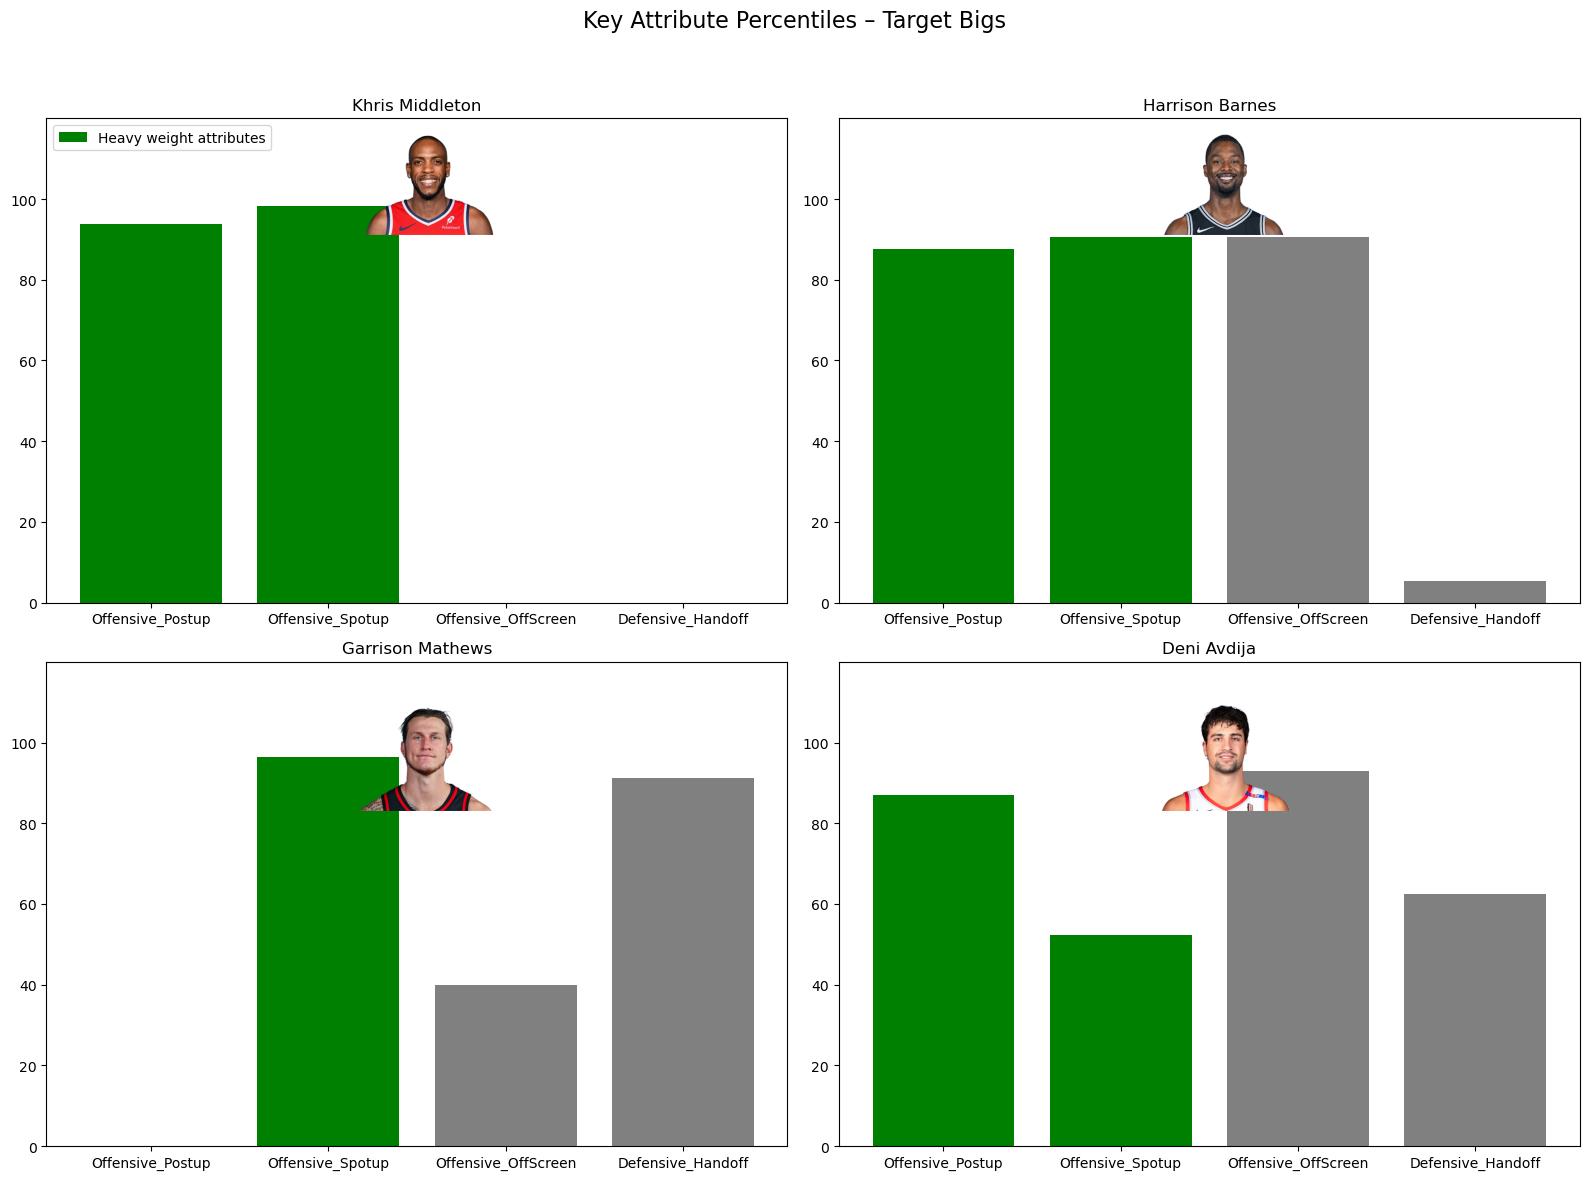

In [47]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

for i, player in enumerate(target_wings):
    ax = axs[i]
    try:
        # Get player data
        player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
        values = [player_data[attr] * 100 for attr in attributes_wings]
        colors = ['green' if attr in key_attributes_wings else 'gray' for attr in attributes_wings]

        # Create bar chart
        ax.bar(attributes_wings, values, color=colors)
        ax.set_ylim(0, 120)
        ticks = ax.get_yticks()
        ax.set_yticks([tick for tick in ticks if tick != 120])
        ax.set_title(f"{player}", fontsize=12)
        if i == 0:
            legend_elements = [Patch(facecolor='green', label='Heavy weight attributes')]
            ax.legend(handles=legend_elements, loc='upper left')

        # Add image
        image_path = f'../images/{player.lower().replace(" ", "_")}.png'
        try:
            img = mpimg.imread(image_path)
            img_ax = fig.add_axes([0.22 + (i % 2) * 0.5, 0.79 - (i // 2) * 0.48, 0.1, 0.1])  # Manually position per subplot
            img_ax.imshow(img)
            img_ax.axis('off')
        except FileNotFoundError:
            print(f"Image not found for {player}: {image_path}")

    except IndexError:
        print(f"No data found for {player}")
        ax.set_visible(False)

# Overall layout
fig.suptitle("Key Attribute Percentiles – Target Bigs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

C:\Users\kevin\AppData\Local\Temp\ipykernel_15096\1492244113.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


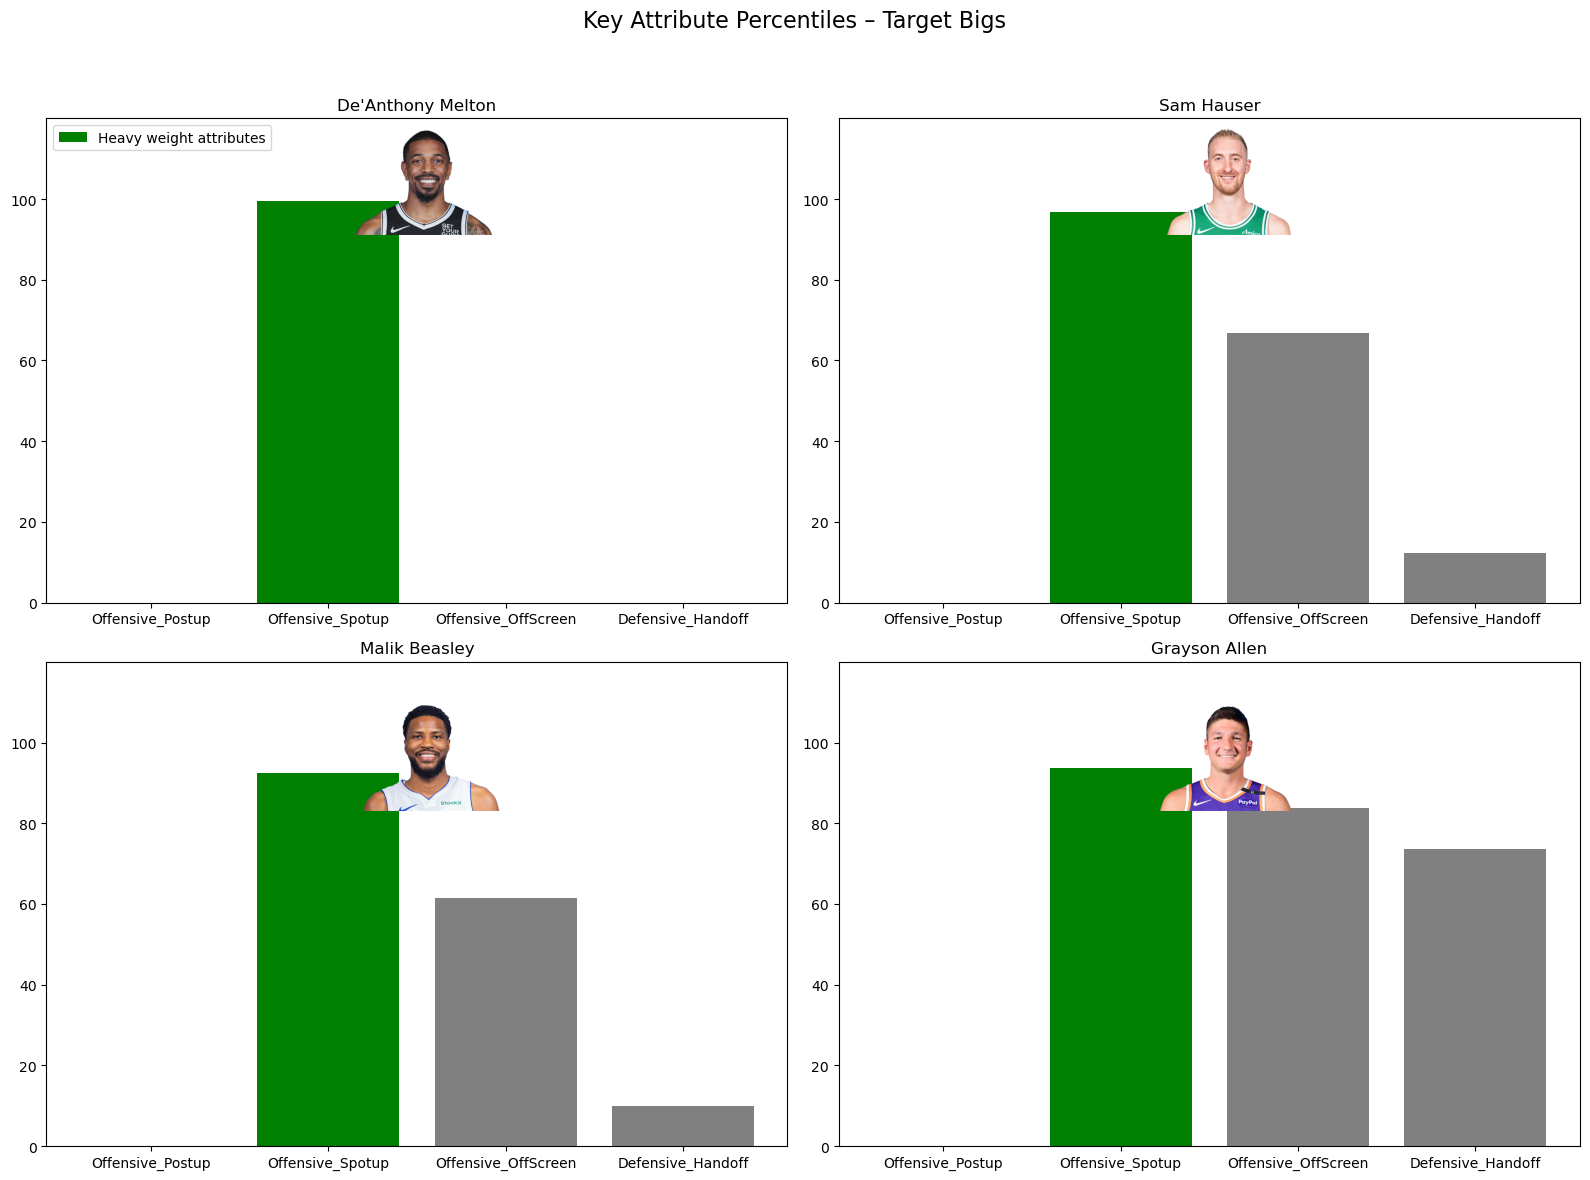

In [48]:
# Create 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(16, 12))
axs = axs.flatten()  # Flatten 2D array to 1D list for easy looping

for i, player in enumerate(target_wings_backup):
    ax = axs[i]
    try:
        # Get player data
        player_data = player_percentiles_2024[player_percentiles_2024['PLAYER_NAME'] == player].iloc[0]
        values = [player_data[attr] * 100 for attr in attributes_wings]
        colors = ['green' if attr in key_attributes_wings else 'gray' for attr in attributes_wings]

        # Create bar chart
        ax.bar(attributes_wings, values, color=colors)
        ax.set_ylim(0, 120)
        ticks = ax.get_yticks()
        ax.set_yticks([tick for tick in ticks if tick != 120])
        ax.set_title(f"{player}", fontsize=12)
        if i == 0:
            legend_elements = [Patch(facecolor='green', label='Heavy weight attributes')]
            ax.legend(handles=legend_elements, loc='upper left')

        # Add image
        image_path = f'../images/{player.lower().replace(" ", "_")}.png'
        try:
            img = mpimg.imread(image_path)
            img_ax = fig.add_axes([0.22 + (i % 2) * 0.5, 0.79 - (i // 2) * 0.48, 0.1, 0.1])  # Manually position per subplot
            img_ax.imshow(img)
            img_ax.axis('off')
        except FileNotFoundError:
            print(f"Image not found for {player}: {image_path}")

    except IndexError:
        print(f"No data found for {player}")
        ax.set_visible(False)

# Overall layout
fig.suptitle("Key Attribute Percentiles – Target Bigs", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()